In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv('C:/Users/hello/Downloads/iris.csv')
x = df.drop(['species'], axis=1)
y = df['species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset
x_train, x_, y_train, y_ = train_test_split(x, y_encoded, test_size=0.4, random_state=1)
x_test, x_cv, y_test, y_cv = train_test_split(x_, y_, test_size=0.5, random_state=1)
print(x_train.shape,x_cv.shape,x_test.shape)

(90, 4) (30, 4) (30, 4)


In [9]:
np.random.seed(42)
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,), name='L1'),
    tf.keras.layers.Dense(128, activation='relu', name='L3'),
    tf.keras.layers.Dense(3, activation='linear', name='L2')
])

# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
# Train the model
model.fit(x_train, y_train, epochs=30)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.3702 - loss: 1.1791
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5446 - loss: 1.0217
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7248 - loss: 0.9140
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7824 - loss: 0.7950
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7182 - loss: 0.7290
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9015 - loss: 0.6716  
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8135 - loss: 0.6352
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7485 - loss: 0.5844
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7499 - loss: 0.5643
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9237 - loss: 0.5471
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9417 - loss: 0.5000
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9214 - loss: 0.4809  
Epoc

In [12]:
# Make predictions
prediction = model.predict(x_test)
predicted_labels = np.argmax(prediction, axis=1)

# Evaluate the model
test_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_cv, y_cv)

# Print accuracy
print("Test accuracy for train:", train_acc)
print("Test accuracy for cv:", test_acc)

# Confusion matrix
cm = confusion_matrix(y_cv, predicted_labels)
print("Confusion Matrix:\n", cm)

# Generate classification report
report = classification_report(y_cv, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9677 - loss: 0.2389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9333 - loss: 0.2668
Test accuracy for train: 0.9666666388511658
Test accuracy for cv: 0.9333333373069763
Confusion Matrix:
 [[3 4 3]
 [4 1 5]
 [2 6 2]]
Classification Report:
               precision    recall  f1-score   support

      setosa       0.33      0.30      0.32        10
  versicolor       0.09      0.10      0.10        10
   virginica       0.20      0.20      0.20        10

    accuracy                           0.20        30
   macro avg       0.21      0.20      0.20        30
weighted avg       0.21      0.20      0.20        30



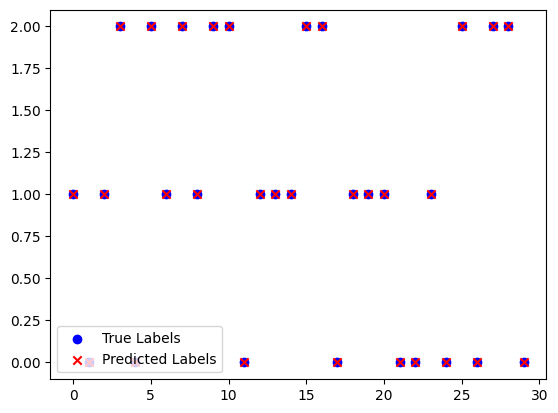

In [16]:
# Plotting
plt.scatter(range(len(y_test)), y_test, marker='o', c='b', label='True Labels')
plt.scatter(range(len(predicted_labels)), predicted_labels, marker='x', c='r', label='Predicted Labels')
plt.legend()
plt.show()